Training a neural network to predict $\delta C_9$ on an event-by-event basis

Import Libraries

In [9]:
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss

from library.nn_training import train_and_eval, select_device
from library.plotting import plot_loss_curves
from library.datasets import Aggregated_Signal_Binned_Dataset

Define Model

In [10]:
class Event_By_Event_NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.layers = nn.Sequential(
            nn.Linear(4, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 44)
         )
        
        self.double()

    def forward(self, x):
        result = self.layers(x)
        return result

Select Device

In [11]:
device = select_device()

Device:  cuda


Load / Generate Datasets

In [12]:
level = "gen"
save_dir = "../../state/new_physics/data/processed"
raw_signal_dir = "../../state/new_physics/data/raw/signal"

train_dataset = Aggregated_Signal_Binned_Dataset(level=level, split="train", raw_trials=range(1,5), save_dir=save_dir)
train_dataset.generate(raw_signal_dir)
train_dataset.load()
train_dataset.to(device)

eval_dataset = Aggregated_Signal_Binned_Dataset(level=level, split="eval", raw_trials=range(5,6), save_dir=save_dir)
eval_dataset.generate(raw_signal_dir)
eval_dataset.load()
eval_dataset.to(device)


In [ ]:
eval_dataset.df["dc9_bin_index"].value_counts()

Train Model

In [14]:
learning_rate = 3e-4
epochs = 10
train_batch_size = 32
eval_batch_size = 32
model = Event_By_Event_NN()
loss_fn = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=learning_rate)

loss_table = train_and_eval(model, train_dataset, eval_dataset, loss_fn, optimizer, epochs, train_batch_size, eval_batch_size, device, move_data=False)


epoch 0 complete:
    Train loss: 3.780699174671356
    Eval loss: 3.7789987744187314

peak gpu memory usage: 0.06842 GB

epoch 1 complete:
    Train loss: 3.779076131795635
    Eval loss: 3.7791083174461395

peak gpu memory usage: 0.06842 GB

epoch 2 complete:
    Train loss: 3.7788234584522926
    Eval loss: 3.7785885022737307

peak gpu memory usage: 0.06842 GB

epoch 3 complete:
    Train loss: 3.778664805319727
    Eval loss: 3.7784009708109854

peak gpu memory usage: 0.06842 GB

epoch 4 complete:
    Train loss: 3.778550225790082
    Eval loss: 3.7784193581782324

peak gpu memory usage: 0.06842 GB

epoch 5 complete:
    Train loss: 3.77845924720654
    Eval loss: 3.7783955656171706

peak gpu memory usage: 0.06842 GB

epoch 6 complete:
    Train loss: 3.7783647480109033
    Eval loss: 3.778484282047613

peak gpu memory usage: 0.06842 GB

epoch 7 complete:
    Train loss: 3.7782834697597165
    Eval loss: 3.7785475597725737

peak gpu memory usage: 0.06842 GB

epoch 8 complete:
    

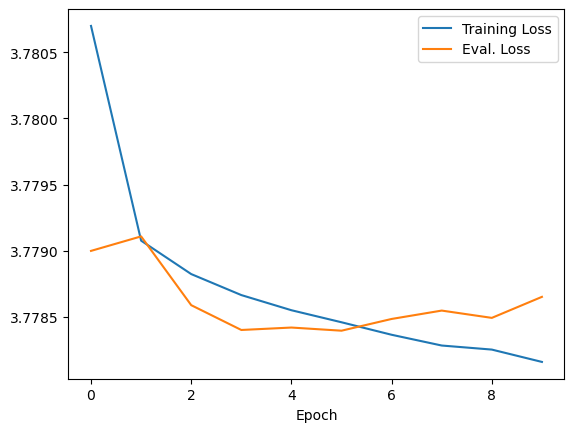

In [15]:
_, ax = plt.subplots()

plot_loss_curves(loss_table["epoch"], loss_table["train_loss"], loss_table["eval_loss"], ax)

plt.show()